In [1]:
import numpy as np
from nilearn.maskers import NiftiLabelsMasker
from neuromaps import transforms 
from nilearn.regions import signals_to_img_labels
from nilearn import regions
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.image import math_img
import warnings
warnings.filterwarnings("ignore")
from nilearn.image import load_img, resample_to_img
import matplotlib.pyplot as plt
from nilearn.masking import apply_mask

/home/user/.local/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/home/user/.local/lib/python3.7/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:

Ridge_correlations_sub01=np.load('TT_Ridge_Cor_Sub01-06/Ridge_correlations_sub01.npy')
Ridge_correlations_sub02=np.load('TT_Ridge_Cor_Sub01-06/Ridge_correlations_sub02.npy')
Ridge_correlations_sub03=np.load('TT_Ridge_Cor_Sub01-06/Ridge_correlations_sub03.npy')
Ridge_correlations_sub04=np.load('TT_Ridge_Cor_Sub01-06/Ridge_correlations_sub04.npy')
Ridge_correlations_sub05=np.load('TT_Ridge_Cor_Sub01-06/Ridge_correlations_sub05.npy')
Ridge_correlations_sub06=np.load('TT_Ridge_Cor_Sub01-06/Ridge_correlations_sub06.npy')


mask_sub01='Data_last/Full_Sub1/sub-01_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
mask_sub02='Data_last/Full_Sub2/sub-02_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
mask_sub03='Data_last/Full_Sub3/sub-03_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
mask_sub04='Data_last/Full_Sub4/sub-04_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
mask_sub05='Data_last/Full_Sub5/sub-05_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
mask_sub06='Data_last/Full_Sub6/sub-06_ses-001_task-s01e01b_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'



mask_files_sub01 = [
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-fLocVisionTask_label-bodyEBA_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-fLocVisionTask_label-faceFFA_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-fLocVisionTask_label-scenePPA_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-retinoVisionNpythy_label-V1_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-retinoVisionNpythy_label-V2_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-retinoVisionNpythy_label-V3_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-yeo7networks_label-defaultMode_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-yeo7networks_label-dorsalAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-yeo7networks_label-frontoParietal_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-yeo7networks_label-sensorimotor_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-yeo7networks_label-ventralAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-01_res-func_atlas-yeo7networks_label-visual_mask.nii.gz'
]

mask_files_sub02 = [
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-fLocVisionTask_label-bodyEBA_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-fLocVisionTask_label-faceFFA_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-fLocVisionTask_label-scenePPA_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-retinoVisionNpythy_label-V1_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-retinoVisionNpythy_label-V2_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-retinoVisionNpythy_label-V3_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-yeo7networks_label-defaultMode_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-yeo7networks_label-dorsalAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-yeo7networks_label-frontoParietal_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-yeo7networks_label-sensorimotor_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-yeo7networks_label-ventralAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-02_res-func_atlas-yeo7networks_label-visual_mask.nii.gz'
]


mask_files_sub03 = [
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-fLocVisionTask_label-bodyEBA_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-fLocVisionTask_label-faceFFA_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-fLocVisionTask_label-scenePPA_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-retinoVisionNpythy_label-V1_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-retinoVisionNpythy_label-V2_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-retinoVisionNpythy_label-V3_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-yeo7networks_label-defaultMode_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-yeo7networks_label-dorsalAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-yeo7networks_label-frontoParietal_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-yeo7networks_label-sensorimotor_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-yeo7networks_label-ventralAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-03_res-func_atlas-yeo7networks_label-visual_mask.nii.gz'
]

mask_files_sub04 = [
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-04_res-func_atlas-yeo7networks_label-defaultMode_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-04_res-func_atlas-yeo7networks_label-dorsalAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-04_res-func_atlas-yeo7networks_label-frontoParietal_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-04_res-func_atlas-yeo7networks_label-sensorimotor_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-04_res-func_atlas-yeo7networks_label-ventralAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-04_res-func_atlas-yeo7networks_label-visual_mask.nii.gz'
]

mask_files_sub05 = [
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-05_res-func_atlas-retinoVisionNpythy_label-V1_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-05_res-func_atlas-retinoVisionNpythy_label-V2_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-05_res-func_atlas-retinoVisionNpythy_label-V3_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-05_res-func_atlas-yeo7networks_label-defaultMode_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-05_res-func_atlas-yeo7networks_label-dorsalAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-05_res-func_atlas-yeo7networks_label-frontoParietal_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-05_res-func_atlas-yeo7networks_label-sensorimotor_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-05_res-func_atlas-yeo7networks_label-ventralAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-05_res-func_atlas-yeo7networks_label-visual_mask.nii.gz'
]

mask_files_sub06 = [
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-06_res-func_atlas-yeo7networks_label-defaultMode_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-06_res-func_atlas-yeo7networks_label-dorsalAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-06_res-func_atlas-yeo7networks_label-frontoParietal_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-06_res-func_atlas-yeo7networks_label-sensorimotor_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-06_res-func_atlas-yeo7networks_label-ventralAttention_mask.nii.gz',
    'masks_4_Sana/masks/masks_4_Sana/tpl-MNI152NLin2009cAsym_sub-06_res-func_atlas-yeo7networks_label-visual_mask.nii.gz'
]




def process_correlations(Ridge_correlations, mask, mask_files):
    
    
  
    region_names = [
    'bodyEBA', 'faceFFA', 'scenePPA', 'V1', 'V2', 'V3', 
    'defaultMode', 'dorsalAttention', 'frontoParietal', 
    'sensorimotor', 'ventralAttention', 'visual'
    ]
    
  
    average_correlations = {region: 0 for region in region_names}
    

    masker = NiftiMasker(mask_img=mask).fit()
    r_img = masker.inverse_transform([Ridge_correlations])
    brain_image = r_img[0]

    # Create a list of mask files corresponding to region names
    region_masks = {region: None for region in region_names}
    for mask_file in mask_files:
        for region in region_names:
            if region in mask_file:
                region_masks[region] = mask_file

    # Process each region mask
    for region, mask_file in region_masks.items():
        if mask_file:
            
            mask_img = load_img(mask_file)
            resampled_mask_img = resample_to_img(mask_img, brain_image)

            
            region_correlations = apply_mask(brain_image, resampled_mask_img)

            
            average_correlation = np.mean(region_correlations)
            
            
            average_correlations[region] = average_correlation
        else:
           
            average_correlations[region] = 0
    
    return average_correlations

average_correlations_1= process_correlations(Ridge_correlations_sub01, mask_sub01,mask_files_sub01)
average_correlations_2= process_correlations(Ridge_correlations_sub02, mask_sub02,mask_files_sub02)
average_correlations_3= process_correlations(Ridge_correlations_sub03, mask_sub03, mask_files_sub03)
average_correlations_4= process_correlations(Ridge_correlations_sub04, mask_sub04, mask_files_sub04)
average_correlations_5= process_correlations(Ridge_correlations_sub05, mask_sub05,mask_files_sub05)
average_correlations_6= process_correlations(Ridge_correlations_sub06, mask_sub06, mask_files_sub06)

In [3]:
average_correlations_1

{'bodyEBA': 0.2351868653483207,
 'faceFFA': 0.14106463431304117,
 'scenePPA': 0.17098857186394334,
 'V1': 0.19125122690145965,
 'V2': 0.18206230535341666,
 'V3': 0.21737928144240085,
 'defaultMode': 0.10735306121250907,
 'dorsalAttention': 0.10673609263374614,
 'frontoParietal': 0.10484416975839105,
 'sensorimotor': 0.07770446844630503,
 'ventralAttention': 0.08714465572346068,
 'visual': 0.1866997767958608}

In [4]:
average_correlations_2

{'bodyEBA': 0.2258402091620354,
 'faceFFA': 0.12686862371745725,
 'scenePPA': 0.13390390191218218,
 'V1': 0.14834804002885796,
 'V2': 0.15471541798940874,
 'V3': 0.18286667574500973,
 'defaultMode': 0.09871284487281565,
 'dorsalAttention': 0.09958166654150923,
 'frontoParietal': 0.0958563348423333,
 'sensorimotor': 0.08210557536255798,
 'ventralAttention': 0.09532944498423773,
 'visual': 0.16195656600484465}

In [5]:
average_correlations_3

{'bodyEBA': 0.24436582709888835,
 'faceFFA': 0.19254613194951928,
 'scenePPA': 0.18168214593107485,
 'V1': 0.17950291396612672,
 'V2': 0.1730010952635742,
 'V3': 0.2010025578005338,
 'defaultMode': 0.1120585482447767,
 'dorsalAttention': 0.101506268578254,
 'frontoParietal': 0.11382088107170214,
 'sensorimotor': 0.08484031506820856,
 'ventralAttention': 0.09523582583297643,
 'visual': 0.20374961424727298}

In [6]:
average_correlations_4

{'bodyEBA': 0,
 'faceFFA': 0,
 'scenePPA': 0,
 'V1': 0,
 'V2': 0,
 'V3': 0,
 'defaultMode': 0.0986919257665648,
 'dorsalAttention': 0.07557396640000806,
 'frontoParietal': 0.09431713382284236,
 'sensorimotor': 0.0670235034191783,
 'ventralAttention': 0.07446680303061612,
 'visual': 0.19083122316240134}

In [7]:
average_correlations_5

{'bodyEBA': 0,
 'faceFFA': 0,
 'scenePPA': 0,
 'V1': 0.16426311882080682,
 'V2': 0.15475255995315634,
 'V3': 0.17929087603203211,
 'defaultMode': 0.09884626734720127,
 'dorsalAttention': 0.09295536347885469,
 'frontoParietal': 0.09766425199403292,
 'sensorimotor': 0.08949107136218018,
 'ventralAttention': 0.08499356519820281,
 'visual': 0.17740497710570102}

In [8]:
average_correlations_6

{'bodyEBA': 0,
 'faceFFA': 0,
 'scenePPA': 0,
 'V1': 0,
 'V2': 0,
 'V3': 0,
 'defaultMode': 0.08283241809715497,
 'dorsalAttention': 0.09397743380484919,
 'frontoParietal': 0.07146785538654246,
 'sensorimotor': 0.0595948519675967,
 'ventralAttention': 0.06481914707734832,
 'visual': 0.13482408667622095}

Shape of average_correlations: (6, 12)


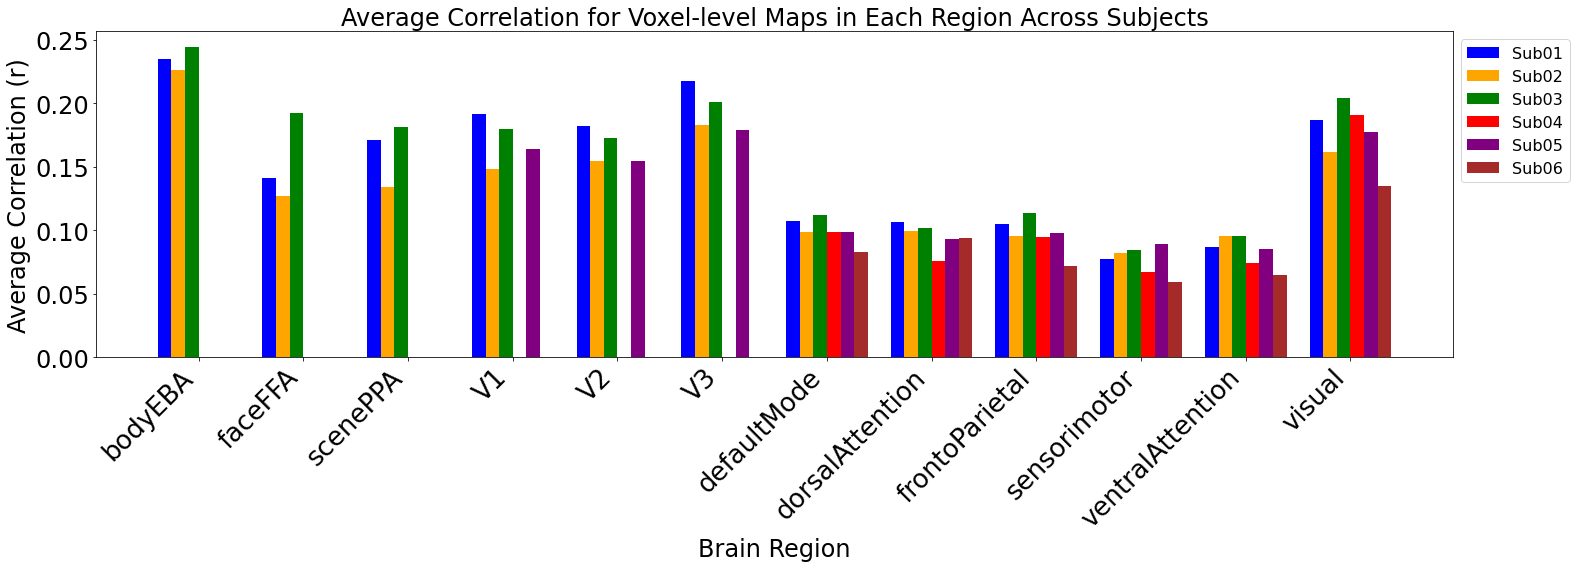

In [9]:
import numpy as np
import matplotlib.pyplot as plt

region_names = [
    'bodyEBA', 'faceFFA', 'scenePPA', 'V1', 'V2', 'V3', 
    'defaultMode', 'dorsalAttention', 'frontoParietal', 
    'sensorimotor', 'ventralAttention', 'visual'
]
subjects = ['Sub01', 'Sub02', 'Sub03', 'Sub04', 'Sub05', 'Sub06']


average_correlations_dicts = [
    average_correlations_1, average_correlations_2, average_correlations_3,
    average_correlations_4, average_correlations_5, average_correlations_6
]

# Convert dictionaries to lists based on the order of region_names
average_correlations_list = []
for avg_corr_dict in average_correlations_dicts:
 
    avg_corr_list = [avg_corr_dict.get(region, 0) for region in region_names]
    average_correlations_list.append(avg_corr_list)

# Convert the list of lists to a numpy array
average_correlations = np.array(average_correlations_list)


print("Shape of average_correlations:", average_correlations.shape)


width = 0.13 
x = np.arange(len(region_names))  

fig, ax = plt.subplots(figsize=(22, 8))

# Colors for each subject
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']


for i in range(len(subjects)):
    ax.bar(x + (i - 2.5) * width, average_correlations[i], width, label=subjects[i], color=colors[i])

ax.set_xlabel('Brain Region', fontsize=24)
ax.set_ylabel('Average Correlation (r)', fontsize=24)
ax.set_title('Average Correlation for Voxel-level Maps in Each Region Across Subjects', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(region_names, rotation=45, ha='right', fontsize=26)
ax.tick_params(axis='y', labelsize=24)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=16)

fig.tight_layout()

plt.show()


In [10]:
def nilearn_create_surface_map_from_Full_signal(data, mask, zoom=None, shape='inflated'): 
      
    masker = NiftiMasker(mask_img=mask).fit()
    Ridge_correlations = data
    r_img = masker.inverse_transform([Ridge_correlations])
       
    
    data_nii=r_img[0]
    print(data_nii.shape)
    
    plotting.plot_img_on_surf(data_nii,
                          surf_mesh='fsaverage',
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          colorbar=True, inflate=True, threshold=0.001,title="Full brain wise")
    plotting.show()    

(264805,)
0.40238924760284633
(97, 115, 97)


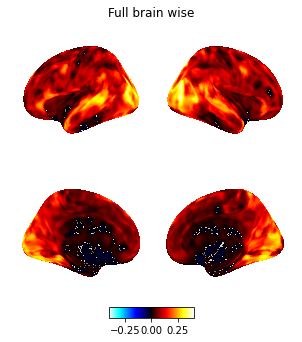

In [11]:
print(Ridge_correlations_sub01.shape)
print(np. max(Ridge_correlations_sub01))


nilearn_create_surface_map_from_Full_signal(Ridge_correlations_sub01, mask_sub01, zoom=None, shape='inflated') 

(266126,)
0.3993069861596737
(97, 115, 97)


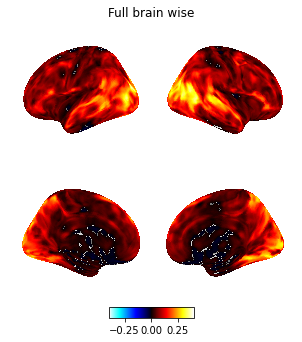

In [12]:
print(Ridge_correlations_sub02.shape)
print(np. max(Ridge_correlations_sub02))


nilearn_create_surface_map_from_Full_signal(Ridge_correlations_sub02, mask_sub02, zoom=None, shape='inflated')

(261880,)
0.4193793469495302
(97, 115, 97)


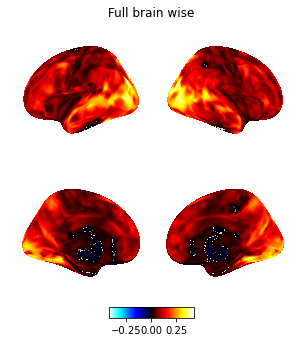

In [13]:
print(Ridge_correlations_sub03.shape)
print(np. max(Ridge_correlations_sub03))


nilearn_create_surface_map_from_Full_signal(Ridge_correlations_sub03, mask_sub03, zoom=None, shape='inflated')

(266391,)
0.3853564740147672
(97, 115, 97)


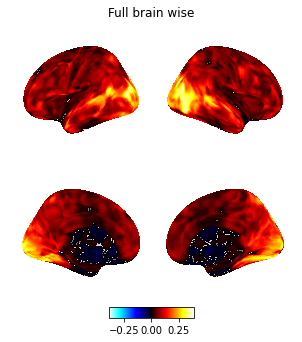

In [14]:
print(Ridge_correlations_sub04.shape)
print(np. max(Ridge_correlations_sub04))


nilearn_create_surface_map_from_Full_signal(Ridge_correlations_sub04, mask_sub04, zoom=None, shape='inflated')

(263574,)
0.3640933919373618
(97, 115, 97)


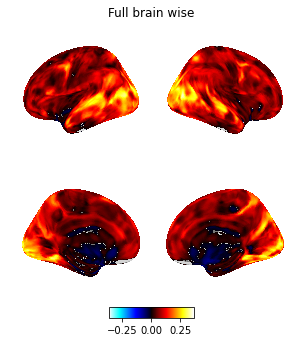

In [15]:
print(Ridge_correlations_sub05.shape)
print(np. max(Ridge_correlations_sub05))


nilearn_create_surface_map_from_Full_signal(Ridge_correlations_sub05, mask_sub05, zoom=None, shape='inflated')

(281532,)
0.330603311590506
(97, 115, 97)


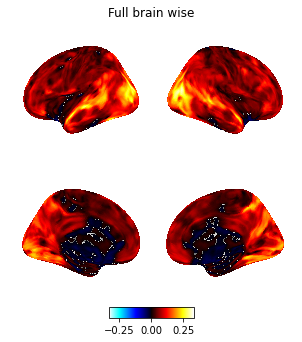

In [16]:
print(Ridge_correlations_sub06.shape)
print(np. max(Ridge_correlations_sub06))


nilearn_create_surface_map_from_Full_signal(Ridge_correlations_sub06, mask_sub06, zoom=None, shape='inflated')